In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import database_explorer_bw25 as dbex
import bw2analyzer as bwa
import bw2data as bwd
import bw2calc as bwc
import bw2io as bwio

In [5]:
bwd.projects.set_current('E3_database_bw25')

In [6]:
bwd.databases

Databases dictionary with 8 object(s):
	E3 chain database DG Energy / Lignite supply
	E3 chain database DG Energy / Lignite supply 2010
	E3 material database
	E3 process database
	E3 process database 2
	E3 process database unique PD_ID
	biosphere3
	ecoinvent 3.7 cut-off

In [7]:
eidb = bwd.Database('ecoinvent 3.7 cut-off')

# Default impact categories
methods_EF = [
    m
    for m in bwd.methods
    if "EF v3.0 EN15804" in str(m)
    and not "no LT" in str(m)
    and not "obsolete" in str(m)
]
methods_CC = [m for m in methods_EF if "climate" in str(m)]
method_CC = methods_CC[0]

# Database explorer basic

In [8]:
list_act = dbex.list_act(database=eidb, name="market for biogas")
list_act.explore(strict=False, comments=False)

List of names:


{'market for biogas', 'market for biogas, from grass'}

List of locations:


{'CH', 'RoW'}

List of units:


{'cubic meter'}

All flows:


,market for biogas_RoW,"market for biogas, from grass_CH",market for biogas_CH
source_name,,,
anaerobic digestion of manure,0.505836,NaN,0.505966
market for biogas,1.000000,NaN,1.000000
treatment of biowaste by anaerobic digestion,0.256133,NaN,0.256066
treatment of sewage sludge by anaerobic digestion,0.233135,NaN,0.233073
treatment of used vegetable cooking oil by anaerobic digestion,0.004896,NaN,0.004895


Carbon footprint:


,climate change \n global warming potential (GWP100),climate change: biogenic \n global warming potential (GWP100),climate change: fossil \n global warming potential (GWP100),climate change: land use and land use change \n global warming potential (GWP100)
market for biogas [RoW],0.772826,0.397729,0.374935,0.000161
"market for biogas, from grass [CH]",-0.321645,-0.513670,0.191978,0.000047
market for biogas [CH],0.566254,0.414821,0.151286,0.000147


All impacts:


,acidification \n accumulated exceedance (ae),climate change \n global warming potential (GWP100),climate change: biogenic \n global warming potential (GWP100),climate change: fossil \n global warming potential (GWP100),climate change: land use and land use change \n global warming potential (GWP100),ecotoxicity: freshwater \n comparative toxic unit for ecosystems (CTUe),particulate matter formation \n impact on human health,eutrophication: marine \n fraction of nutrients reaching marine end compartment (N),eutrophication: freshwater \n fraction of nutrients reaching freshwater end compartment (P),eutrophication: terrestrial \n accumulated exceedance (AE),human toxicity: carcinogenic \n comparative toxic unit for human (CTUh),human toxicity: non-carcinogenic \n comparative toxic unit for human (CTUh),ionising radiation: human health \n human exposure efficiency relative to u235,land use \n soil quality index,ozone depletion \n ozone depletion potential (ODP),photochemical ozone formation: human health \n tropospheric ozone concentration increase,energy resources: non-renewable \n abiotic depletion potential (ADP): fossil fuels,material resources: metals/minerals \n abiotic depletion potential (ADP): elements (ultimate reserves),water use \n user deprivation potential (deprivation-weighted water consumption)
market for biogas [RoW],0.004328,0.772826,0.397729,0.374935,0.000161,11.256085,4.403896e-08,0.000275,0.000111,0.013856,2.865461e-10,2.013222e-08,0.011994,3.642139,9.859345e-09,0.001458,2.858572,0.000002,0.028114
"market for biogas, from grass [CH]",0.003729,-0.321645,-0.513670,0.191978,0.000047,1.013958,2.545988e-08,0.000974,0.000030,0.016427,5.852706e-11,-1.021049e-08,0.026353,20.991014,8.924992e-09,0.000329,1.266586,0.000002,0.064715
market for biogas [CH],0.003154,0.566254,0.414821,0.151286,0.000147,3.504881,4.528446e-08,0.000209,0.000017,0.013326,1.800051e-10,2.682037e-09,0.028264,3.070125,2.148676e-08,0.000555,1.788804,0.000002,0.046701


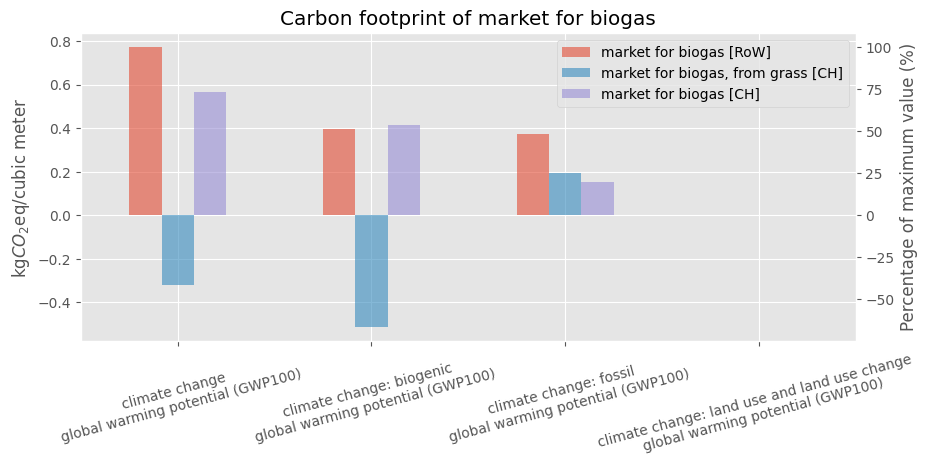

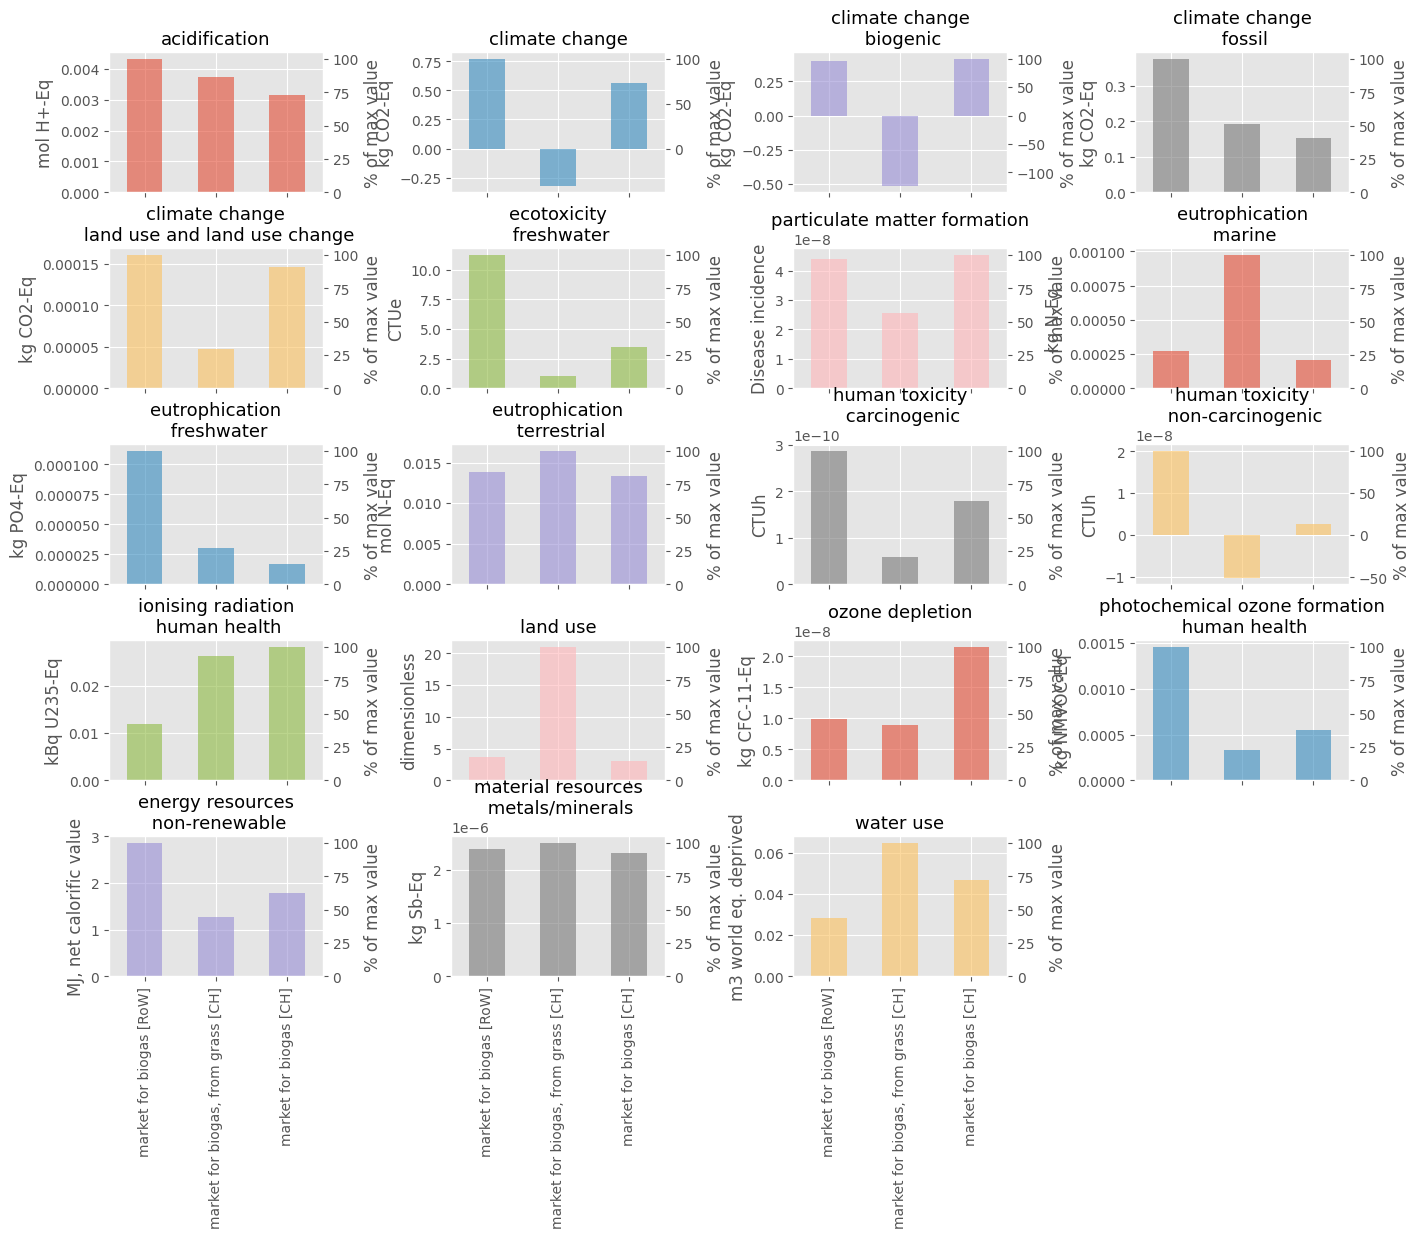

In [9]:
list_act.analyse(methods_CC, methods_EF, print_data = True)

'market for biogas' (cubic meter, RoW, None)
('EF v3.0 EN15804', 'climate change', 'global warming potential (GWP100)')
('EF v3.0 EN15804', 'climate change: biogenic', 'global warming potential (GWP100)')
('EF v3.0 EN15804', 'climate change: fossil', 'global warming potential (GWP100)')
('EF v3.0 EN15804', 'climate change: land use and land use change', 'global warming potential (GWP100)')


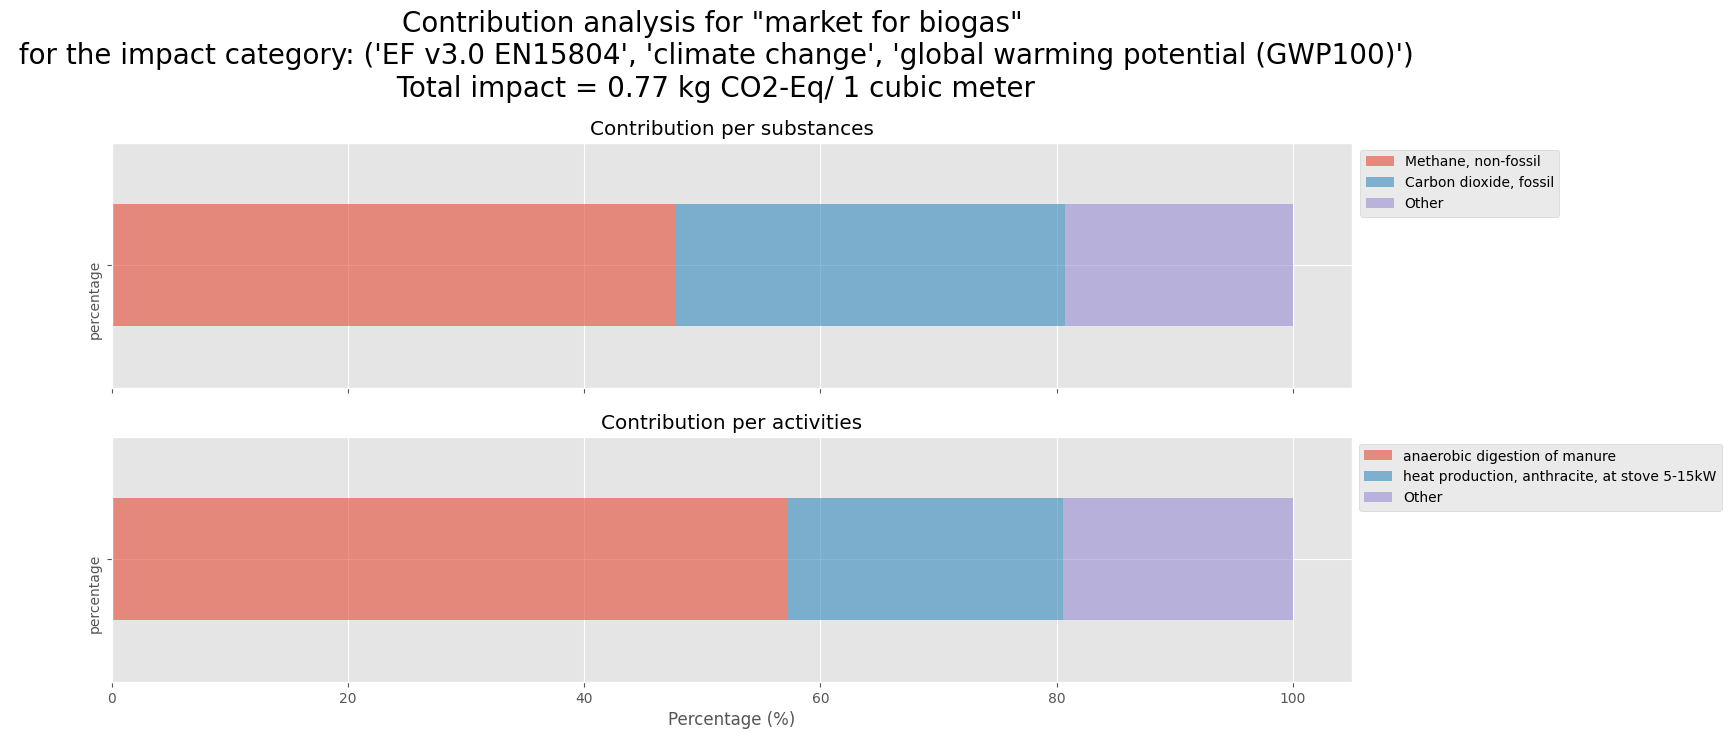

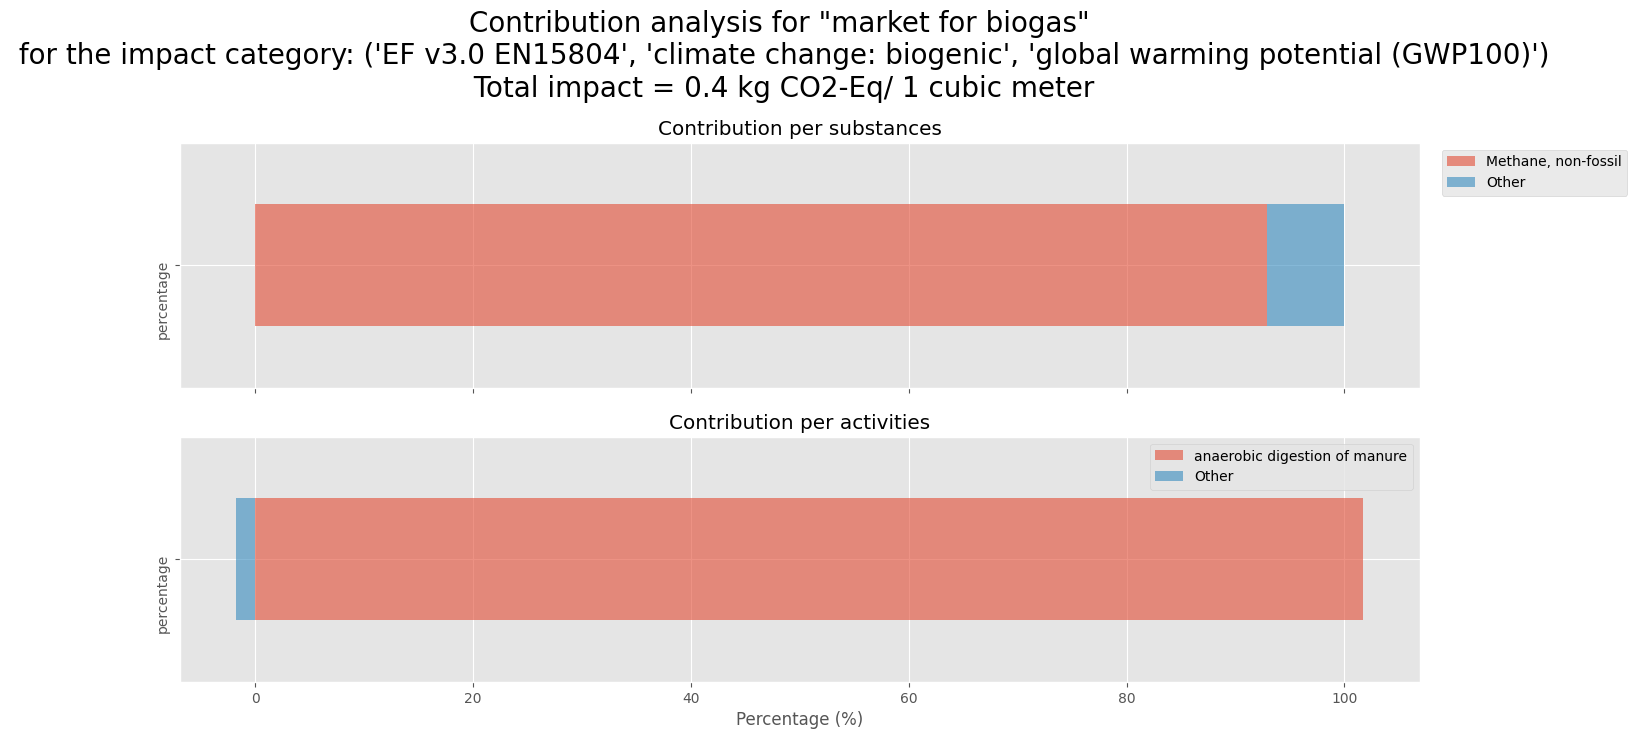

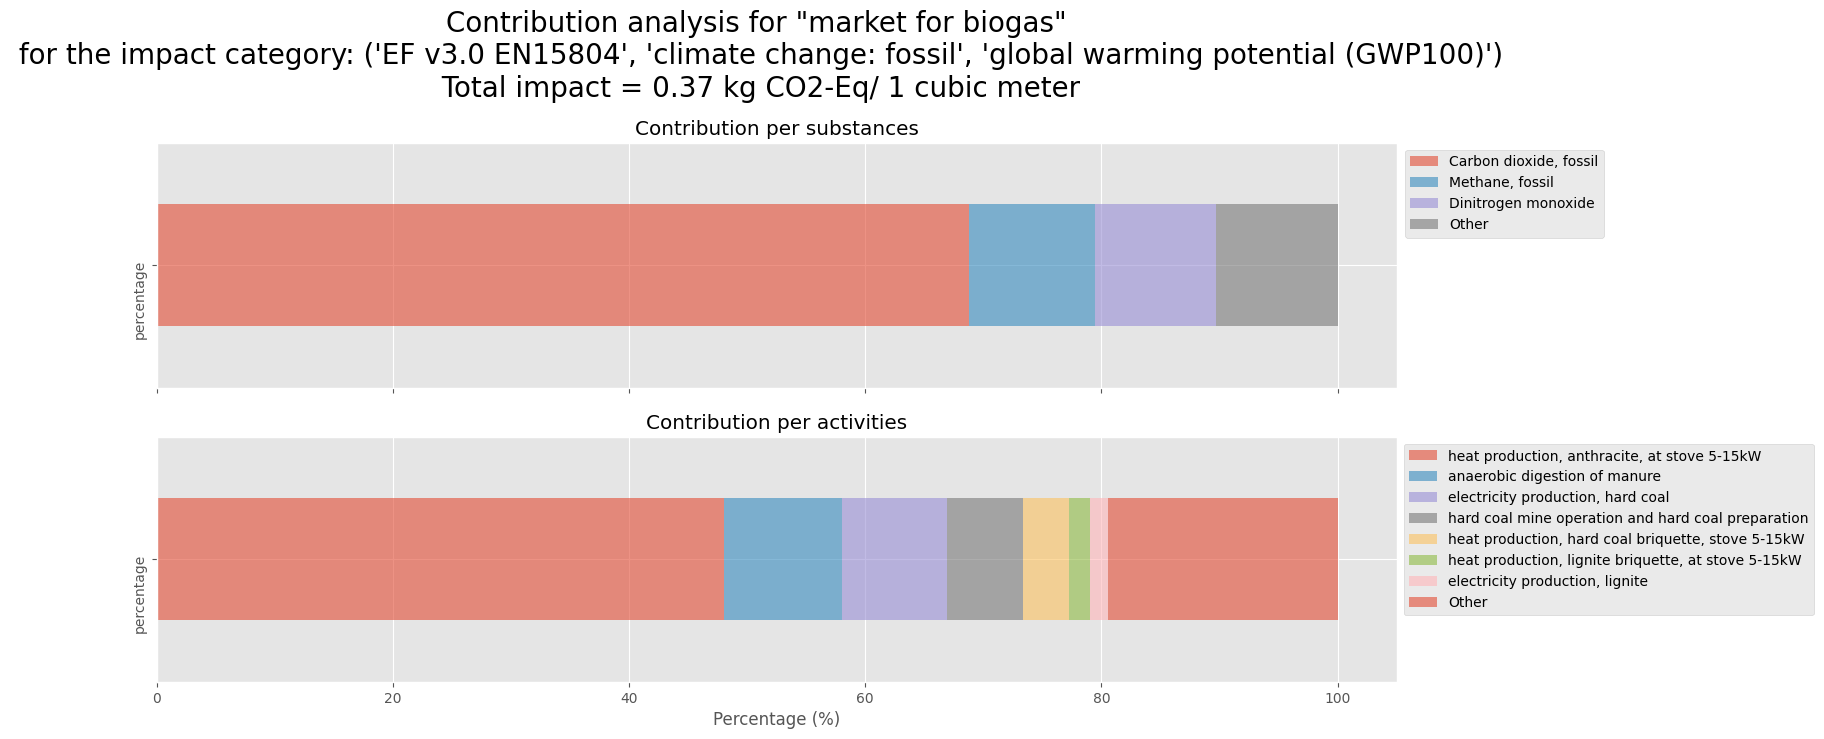

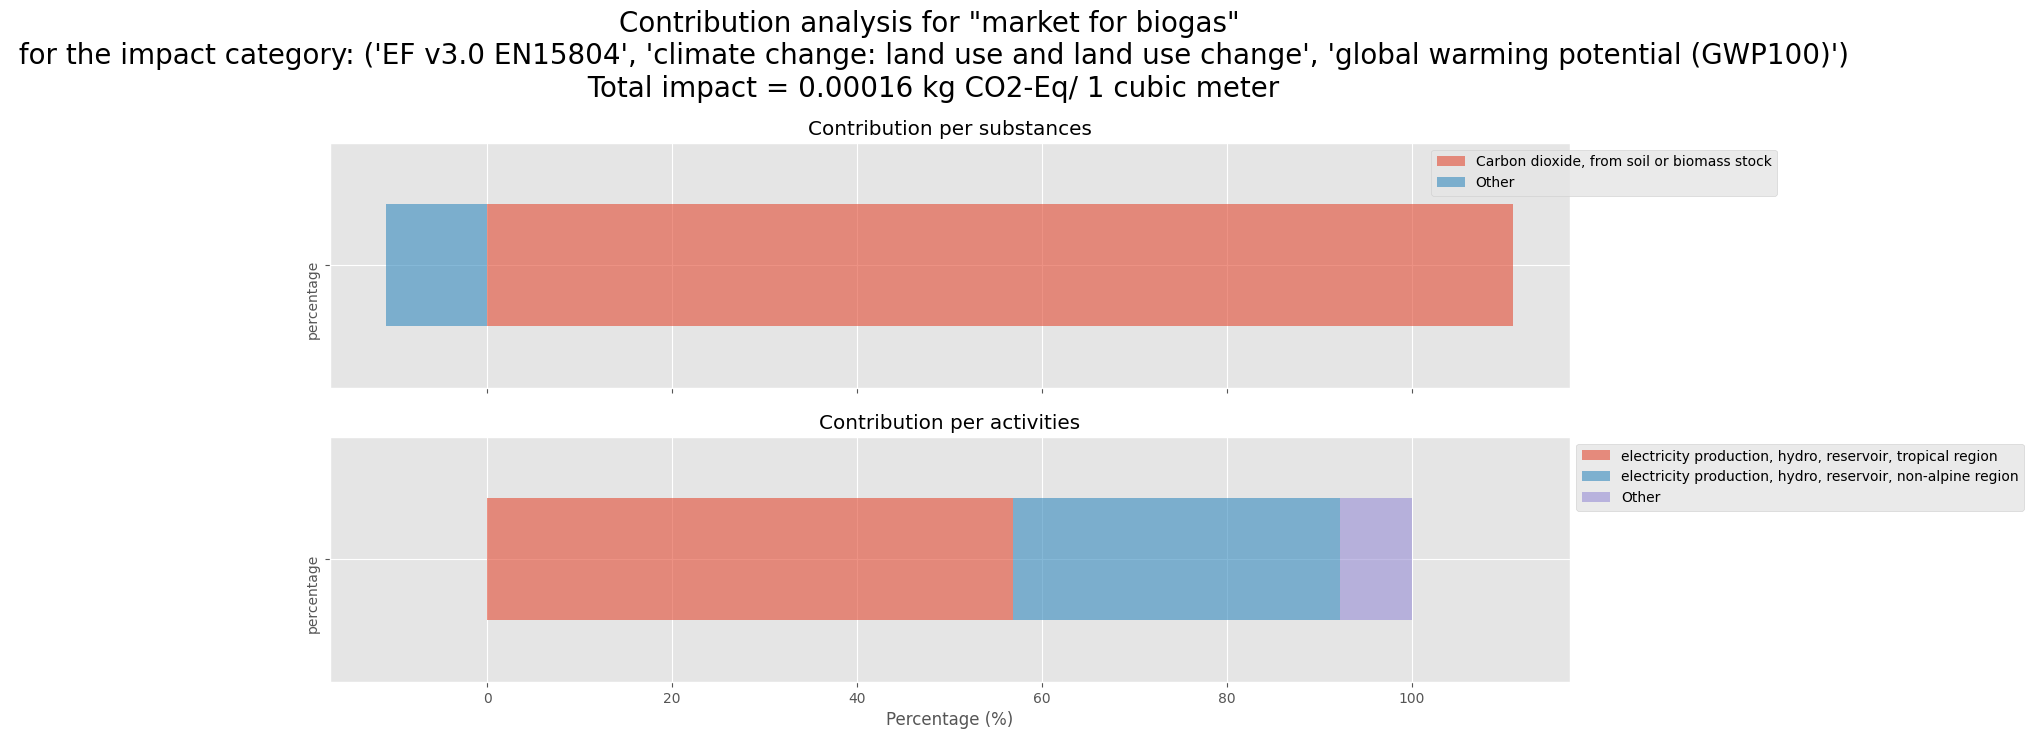

In [7]:
#Explore over the methods
list_act.contribution_analysis(i = 0, methods = methods_CC)

'market for biogas' (cubic meter, RoW, None)
('EF v3.0 EN15804', 'climate change', 'global warming potential (GWP100)')
'market for biogas' (cubic meter, CH, None)
('EF v3.0 EN15804', 'climate change', 'global warming potential (GWP100)')
'market for biogas, from grass' (cubic meter, CH, None)
('EF v3.0 EN15804', 'climate change', 'global warming potential (GWP100)')


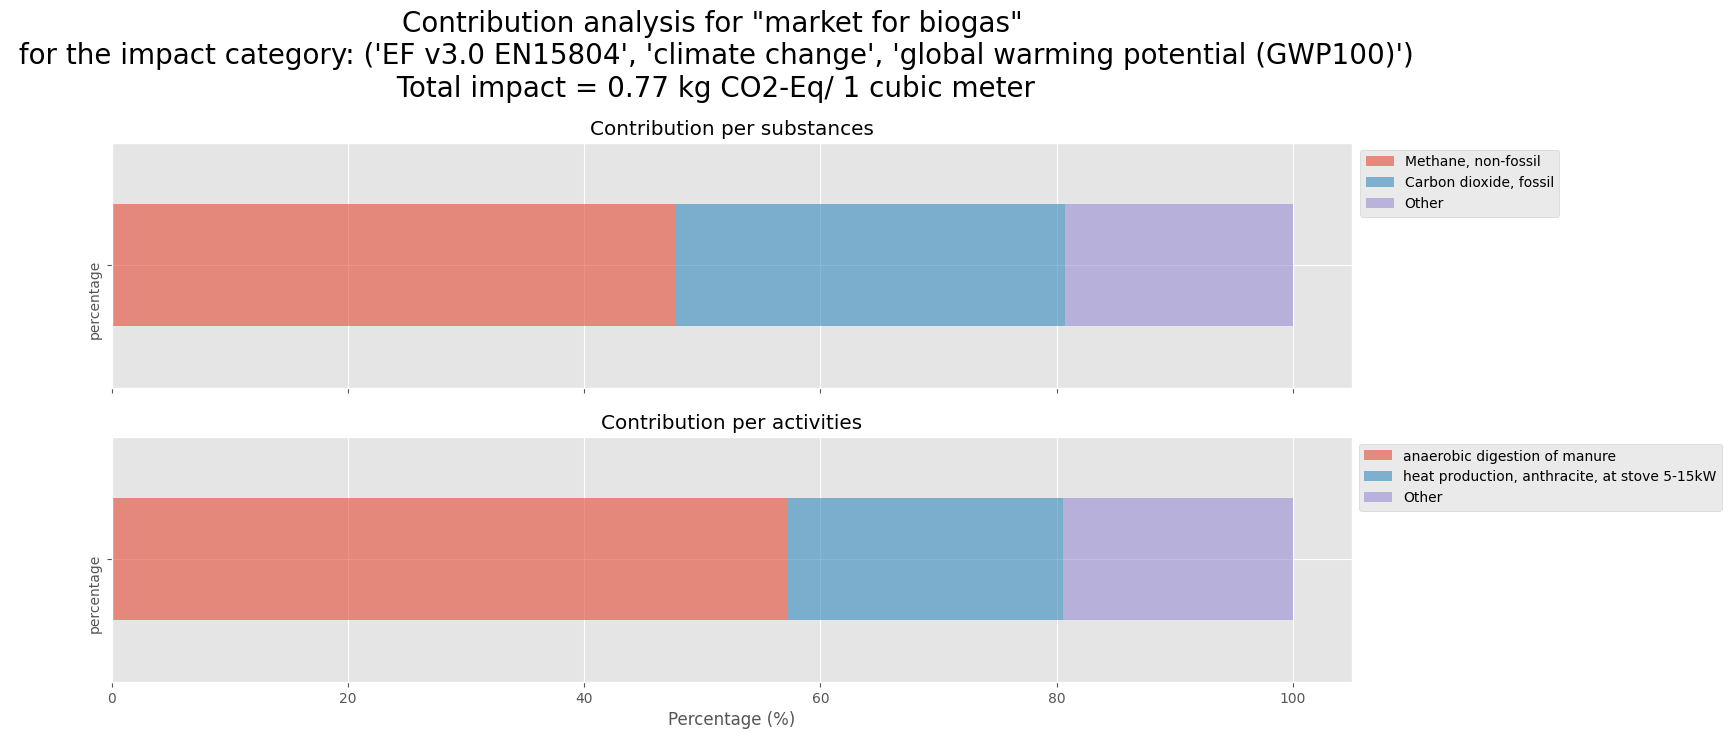

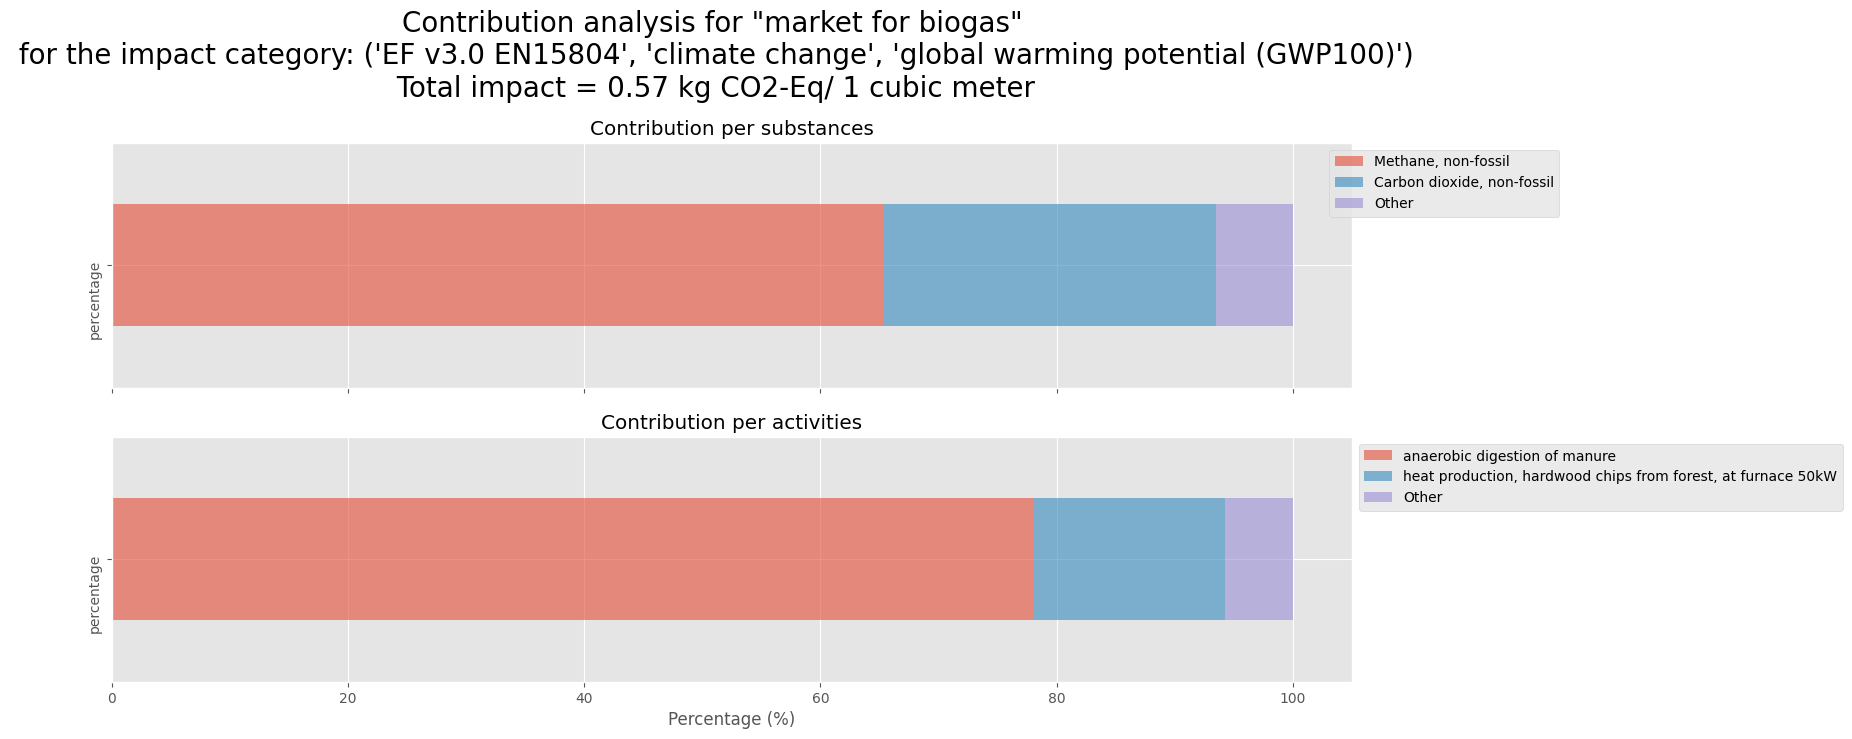

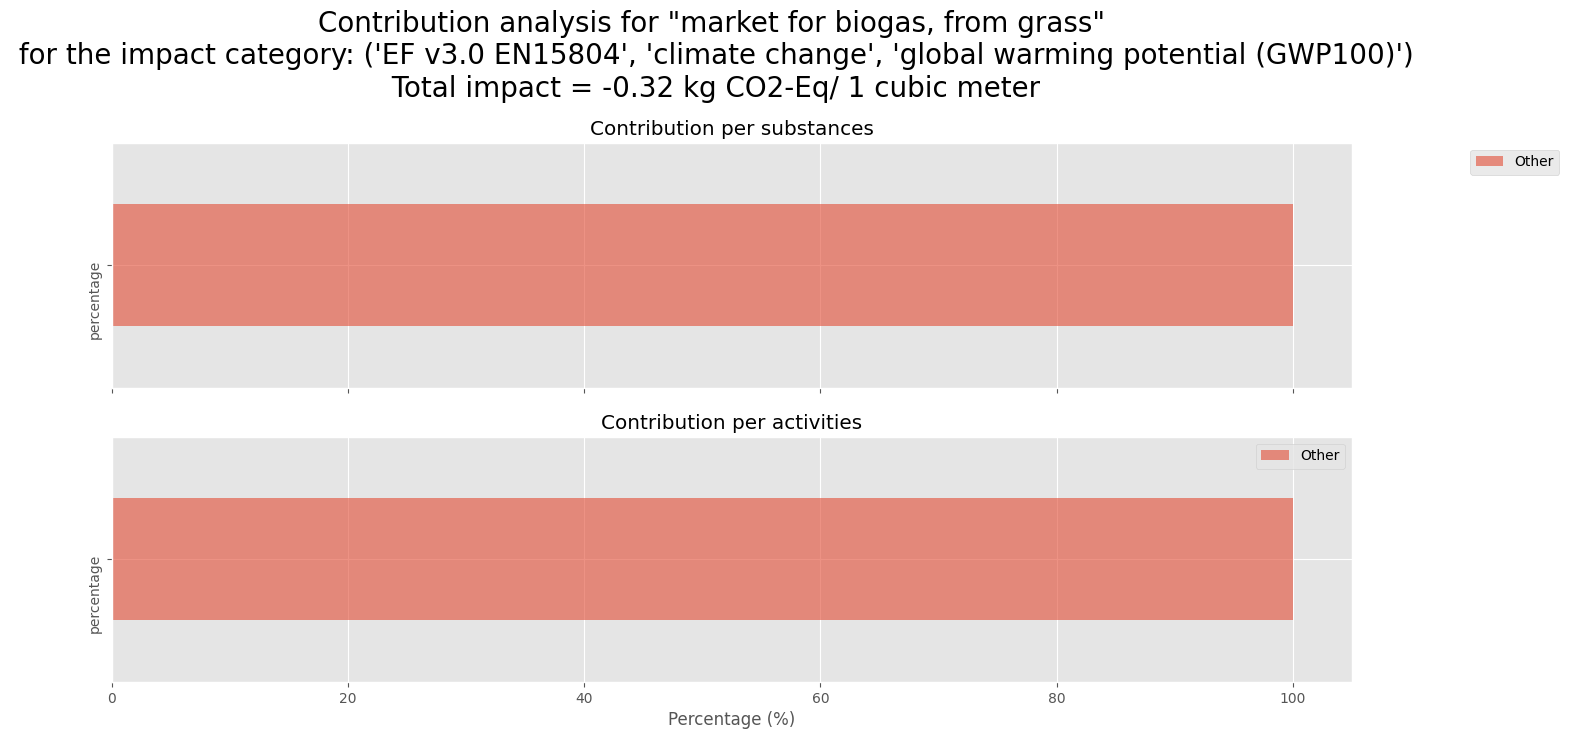

In [8]:
#Explore over the activities
for i, act in enumerate(list_act.list_act):
    list_act.contribution_analysis(i = i, methods = [methods_CC[0]])

# Database explorer Dash board

In [10]:
method_CC

('EF v3.0 EN15804', 'climate change', 'global warming potential (GWP100)')

In [14]:
list_act.DashBoard(i = 0, method = method_CC, cutoff=0.05)

'market for biogas' (cubic meter, RoW, None)
('EF v3.0 EN15804', 'climate change', 'global warming potential (GWP100)')
0.772825630606261


# Old

In [ ]:
import math

def treat_multiple_parent(df):
    # add some helpful columns
    df['act_id'] = df['ids'].apply(lambda x: x.split('-')[-1])
    df['parent_act_id'] = df['parent_ids'].apply(lambda x: x.split('-')[-1])
    df['depth'] = df['ids'].apply(lambda x: len(x.split('-')))
    df['scaled_pos_impact'] = df['impact_pos']
    df['scaled_neg_impact'] = df['impact_neg']

    # calculate the overall impact of activities with multiple parents
    # if the same id is found several times, the impacts will be summed
    grouped = df.groupby("act_id")
    multi_parent_pos_sum = grouped['impact_pos'].sum()
    multi_parent_neg_sum = grouped['impact_neg'].sum()
    # get only the activities that have multiple parents
    # sorting by depth allows us to traverse this later in ascending order (start with activities close to the functional unit). This might not be strictly neccessary
    multi_parents = pd.concat(g for _, g in grouped if len(g) > 1).sort_values(by='depth')
    # and add the total impact
    multi_parents['impact_pos_sum'] = multi_parents['act_id'].apply(lambda x: multi_parent_pos_sum[x])
    multi_parents['impact_neg_sum'] = multi_parents['act_id'].apply(lambda x: multi_parent_neg_sum[x])

    #display(multi_parents)

    # apply a user defined scale
    # here we cheat a bit by flooring the value because sometimes the sums of the children are bigger than the parent
    # there is definitely a better way to do this - the best would be to separate the chains from the beginning in the GraphTraversal
    def apply_scale(number, scale):
        #return number * scale
        return math.floor(number * scale * 100) / 100

    # recursive function that scales all children to the share of this branch
    def scale_children(multi_parent_id, scale):
        child_rows = df.eval('parent_ids == @multi_parent_id')
        df.loc[child_rows, 'scaled_pos_impact'] = df.loc[child_rows, 'scaled_pos_impact'].apply(lambda x: apply_scale(x, scale))
        # double negative to make floor work in the right way
        df.loc[child_rows, 'scaled_neg_impact'] = df.loc[child_rows, 'scaled_neg_impact'].apply(lambda x: -apply_scale(-x, scale))
        # repeat for all children: children become new parents
        new_parents = df.loc[child_rows, 'ids']
        for new_parent in new_parents:
            scale_children(new_parent, scale)

    for parent, impact, impact_sum in zip(multi_parents['ids'], multi_parents['impact_pos'], multi_parents['impact_pos_sum']):
        #print(parent)
        scale_children(parent, impact/impact_sum)
    return df

In [15]:
lca = bwc.LCA({act: 1}, method_CC)
lca.lci()
lca.lcia()

In [16]:
lca.method

('EF v3.0 EN15804', 'climate change', 'global warming potential (GWP100)')

In [ ]:
import plotly.graph_objects as go

def plot_Sankey(df, unit):

    # Put the data in a Sankey format. Strangely it didn't work with ids, so we just put integers as ids.
    data_sankey = df.query('parent_ids != ""').to_dict(orient='list')
    nodes, numbers = [], {}
    counter = 0
    for id in data_sankey["ids"]:
        numbers[id] = counter
        nodes.append(data_sankey['label'][counter])
        counter += 1
    counter2 = 0
    for id in data_sankey["parent_ids"]:
        numbers[id] = counter
        nodes.append(data_sankey['parent'][counter2])
        counter += 1
        counter2 += 1

    links = dict(
        source = [numbers[id] for id in data_sankey["ids"]],
        target = [numbers[id] for id in data_sankey["parent_ids"]],
        value = data_sankey["impact"],
        hovertemplate='<b>%{source.label}</b> to <b>%{target.label}</b><br>Impact: %{value:.2} ' + unit,
    )
    #print(links, numbers, nodes)
    fig_sankey = go.Figure(data=[go.Sankey(
        link = links,
        node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = nodes,
        color = "blue",
        hovertemplate='%{label}<br>Total impact: %{value:.2} ' + unit,
        ),
        valueformat='.0f',
    )])
    fig_sankey.update_layout(title_text="Sankey Diagram of impact contributions", font_size=10, height=700)
    return fig_sankey

In [ ]:
def plot_Sunbursts(df, unit):
    
    data_sunburst = df #.query('depth < 5')
    ids = list(data_sunburst['ids'])
    parents = list(data_sunburst['parent_ids'])
    labels = list(data_sunburst['label'])
    labels_short = [label[:18] for label in labels]
    values_pos = list(data_sunburst['scaled_pos_impact'])
    values_neg = list(-data_sunburst['scaled_neg_impact'])

    def create_sunburst(values, colorscale, title, valuesign):
        fig = go.Figure(go.Sunburst(
                    #data,
                    ids=ids,
                    labels=labels_short,
                    parents=parents,
                    values=values,
                    branchvalues="total",
                    customdata=labels,
                    #color='labels_short',
                    marker=dict(colorscale=colorscale),
                    #color_continuous_scale='algae',
                    hovertemplate='<b>%{customdata} </b> <br> Impact: ' + valuesign + '%{value:.2} ' + unit + '<br> %{percentParent:.2%} of %{parent}',
                    #maxdepth=2
                )
            )
        fig.update_layout(title=title, autosize=True, margin=dict(t=0,b=0,l=0,r=0), coloraxis = None, height=700) 
        return fig

    fig_sunburst_pos = create_sunburst(values_pos, 'Burg', 'Emissions', '')
    fig_sunburst_neg = create_sunburst(values_neg, 'algae', 'Absorptions', '-')
    return fig_sunburst_pos, fig_sunburst_neg

In [ ]:
def plot_WaterFall(trav, unit):
    
    main_edge = trav['edges'][0]
    fig_waterfall = go.Figure(go.Waterfall(
        orientation = "v",
        measure = ["relative", "relative", "total"],
        x = ['Emissions', 'Absorptions', 'Total'],
        y = [main_edge["impact_pos"], main_edge["impact_neg"], main_edge["impact"]],
        decreasing = {"marker":{"color":"aquamarine"}},
        increasing = {"marker":{"color":"lightcoral"}},
        )
    )
    fig_waterfall.update_layout(title='Overall life cycle impact', yaxis_title=unit)
    return fig_waterfall



In [ ]:
def calculate_DashBoard(lca):
    
    trav = JRCAssumedDiagonalGraphTraversal().calculate(lca, cutoff=0.05)

    # name for the activities from activity_dict
    id_to_key = {v:k for k, v in lca.activity_dict.items()}
    activities = {str(id): bd.get_activity(id_to_key[id]) for id in list(trav["nodes"].keys())[1:]}

    # put all edge data in a dataframe to be able to scale the children of multi-parent processes
    ids = [edge["from"] for edge in trav['edges']]
    labels = [activities[id.split('-')[-1]]['name']+' ('+activities[id.split('-')[-1]]['location']+')' for id in ids]
    parent_ids = [""] + [edge["to"] for edge in trav['edges']][1:]

    data = dict(ids = ids,
                label = labels,            
                #location = [act['location'] for act in activities],
                parent_ids = parent_ids,
                parent = [activities[id.split('-')[-1]]['name']+' ('+activities[id.split('-')[-1]]['location']+')' if id != '' else '' for id in parent_ids],
                labels_short = [label[:18] for label in labels],
                impact_pos = [edge["impact_pos"] for edge in trav['edges']],
                impact_neg = [edge["impact_neg"] for edge in trav['edges']],
                impact = [edge["impact"] for edge in trav['edges']],
                flow_amount = [edge["amount"] for edge in trav['edges']]
                #value_pct = value_pct
            )
    df = pd.DataFrame.from_dict(data)

    df = treat_multiple_parent(df)

    data = df.to_dict(orient='list')

    method = lca.method
    unit = bd.Method(method).metadata['unit']

    fig_sunburst_pos, fig_sunburst_neg = plot_Sunbursts(df, unit)

    fig_waterfall = plot_WaterFall(trav, unit)

    fig_sankey = plot_Sankey(df, unit)

    return fig_sunburst_pos, fig_sunburst_neg, fig_waterfall, fig_sankey

In [ ]:
from dash import Dash, dash_table, dcc, html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc

def plot_DashBoard(df, lca, fig_sunburst_pos, fig_sunburst_neg, fig_waterfall, fig_sankey):
    method = lca.method
    unit = bd.Method(method).metadata['unit']

    app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP, dbc.icons.FONT_AWESOME])

    main_activity = df.query('depth == 1')
    methods = ['-'.join(x) for x in bd.methods if 'IPCC 2013' in x[0]]

    app.layout = html.Div(
        [
            dbc.Card([
                dbc.CardHeader("Contribution analysis: positive and negative impacts"),
                dbc.CardBody(           
                    dbc.Row([
                        dbc.Col([
                            html.Label('Activity'),
                            dcc.Dropdown(main_activity["label"], main_activity["label"][0], id='activity-select'),
                        ]),
                        dbc.Col([
                            html.Label('Method'),
                            dcc.Dropdown(methods, '-'.join(method), id='method-select'),
                            html.Div(['All results shown in ', html.Span(unit, id='unit')])
                        ]),
                    ]),
                ),
            ], style={'zIndex': '808'}),
            dbc.Row(
                [
                    dbc.Col([html.Div('Emissions', style={'textAlign': 'center', 'width': '100%'})], width=5),
                    dbc.Col([], width=2),
                    dbc.Col([html.Div('Absorptions', style={'textAlign': 'center', 'width': '100%'})], align="center", width=5),
                ],
                justify="center", align="center", style={'position': 'relative', 'zIndex': '32000', 'margin-bottom': '0px'} 
            ),
            dbc.Row(
                [
                    dbc.Col(dcc.Graph(id="sunburst-pos-graph", figure=fig_sunburst_pos), width=5),
                    dbc.Col(dcc.Graph(id="waterfall-graph", figure=fig_waterfall), width=2),
                    dbc.Col(dcc.Graph(id="sunburst-neg-graph", figure=fig_sunburst_neg), width=5),
                ],
                align="center", style={'margin-top': '-100px'} 
            ),
            dbc.Row(
                [
                    dbc.Col(dcc.Graph(id="sankey-graph", figure=fig_sankey), md=12),
                ],
                align="center",
            ),
        ],
    )

    if __name__ == '__main__':
        app.run_server(port=8058, debug=True, use_reloader=False)

In [ ]:
trav = JRCAssumedDiagonalGraphTraversal().calculate(lca, cutoff=0.05)

In [ ]:
# name for the activities from activity_dict
id_to_key = {v:k for k, v in lca.activity_dict.items()}
activities = {str(id): bd.get_activity(id_to_key[id]) for id in list(trav["nodes"].keys())[1:]}

In [ ]:
# put all edge data in a dataframe to be able to scale the children of multi-parent processes
ids = [edge["from"] for edge in trav['edges']]
labels = [activities[id.split('-')[-1]]['name']+' ('+activities[id.split('-')[-1]]['location']+')' for id in ids]
parent_ids = [""] + [edge["to"] for edge in trav['edges']][1:]

data = dict(ids = ids,
            label = labels,            
            #location = [act['location'] for act in activities],
            parent_ids = parent_ids,
            parent = [activities[id.split('-')[-1]]['name']+' ('+activities[id.split('-')[-1]]['location']+')' if id != '' else '' for id in parent_ids],
            labels_short = [label[:18] for label in labels],
            impact_pos = [edge["impact_pos"] for edge in trav['edges']],
            impact_neg = [edge["impact_neg"] for edge in trav['edges']],
            impact = [edge["impact"] for edge in trav['edges']],
            flow_amount = [edge["amount"] for edge in trav['edges']]
            #value_pct = value_pct
        )
df = pd.DataFrame.from_dict(data)